In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#os.chdir("/home/anubrata/Documents/datascience")
os.getcwd()

In [9]:
arti_data=pd.read_csv("A_cip-1_SNP.csv",encoding="utf-16")

In [17]:
arti_data[arti_data.Gene_ID=='--']

,Chrom,Position,Reference,Variant,Type,Zygosity,Quality,Coverage,Gene_ID,Trancript_ID,Exon_ID,Exon_Rank,Effect,old_AA/new_AA,Old_codon/New_codon,Codon_Num(CDS)
42,NC_003197.2,5890,T,C,SNP,Hom,221.9990,1221,--,--,--,--,INTERGENIC,NaN,NaN,NaN
62,NC_003197.2,7420,G,T,SNP,Hom,221.9990,1090,--,--,--,--,INTERGENIC,NaN,NaN,NaN
63,NC_003197.2,7432,A,G,SNP,Hom,221.9990,1125,--,--,--,--,INTERGENIC,NaN,NaN,NaN
64,NC_003197.2,7508,T,C,SNP,Hom,221.9990,1287,--,--,--,--,INTERGENIC,NaN,NaN,NaN
78,NC_003197.2,9326,A,G,SNP,Hom,221.9990,1440,--,--,--,--,INTERGENIC,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40840,NC_003197.2,4855324,A,G,SNP,Hom,88.9974,1039,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40841,NC_003197.2,4855368,A,G,SNP,Hom,221.9990,1083,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40842,NC_003197.2,4855382,G,A,SNP,Hom,221.9990,1062,--,--,--,--,INTERGENIC,NaN,NaN,NaN
40846,NC_003197.2,4856558,T,C,SNP,Hom,221.9990,512,--,--,--,--,INTERGENIC,NaN,NaN,NaN


In [10]:
rev_data=arti_data.drop(['Chrom','Type','Zygosity','Trancript_ID','Exon_ID'],axis=1)
rev_data['Gene_ID']=rev_data['Gene_ID'].replace('--','Intergenic')
#mutated=pd.value_counts(rev_data.Gene_ID)
#highly_mutated=mutated[mutated>50]
#highly_mutated.to_csv("highly_mutated.csv")
#mutated.to_csv("mutated.csv")
rev_data.head()

,Position,Reference,Variant,Quality,Coverage,Gene_ID,Exon_Rank,Effect,old_AA/new_AA,Old_codon/New_codon,Codon_Num(CDS)
0,507,C,T,221.999,1028,thrA,1,SYNONYMOUS_CODING,G/G,ggC/ggT,57.0
1,537,A,C,221.999,1130,thrA,1,SYNONYMOUS_CODING,A/A,gcA/gcC,67.0
2,744,A,C,221.999,1316,thrA,1,SYNONYMOUS_CODING,G/G,ggA/ggC,136.0
3,747,T,C,221.999,1431,thrA,1,SYNONYMOUS_CODING,L/L,ctT/ctC,137.0
4,762,G,A,221.999,1355,thrA,1,SYNONYMOUS_CODING,G/G,ggG/ggA,142.0


In [5]:
high_mut_list=['STM4261','Gene_gene2690','metH','mukB','STM4489','gltB','rpoC']
high_mut_df=rev_data.loc[rev_data['Gene_ID'].isin(high_mut_list)]

In [6]:
#out1=rev_data.groupby('Gene_ID')['Position'].value_counts(sort=True)    
#out1.to_csv('out1.csv')

C:\Users\anubr\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [19]:
#out2=rev_data.groupby(['Gene_ID','Position','Old_codon/New_codon','Effect'])['Gene_ID'].count()    
#out2.head()
#out2.to_csv('out2.csv')

In [18]:
rev_nonsyn=rev_data[rev_data.Effect=='NON_SYNONYMOUS_CODING']
rev_syn=rev_data[rev_data.Effect=='SYNONYMOUS_CODING']
#rev_nonsyn.reset_index(inplace=True)
#arti_new_nonsyn.drop("index",axis=1,inplace=True)
#arti_new_nonsyn=arti_new_nonsyn.loc[:,["Gene_ID","Position","Reference","Variant","Old_codon/New_codon"]]
#l=list(arti_new_nonsyn.columns)
#l[4]="OlCod_NwCod"
#arti_new_nonsyn.columns=l
#arti_new_nonsyn.head()
rev_syn["Effect"].value_counts()
rev_data["Effect"].value_counts()

SYNONYMOUS_CODING            30300
NON_SYNONYMOUS_CODING         5636
INTERGENIC                    4418
INTRAGENIC: Gene_gene2690      151
SYNONYMOUS_STOP                 28
                             ...  
INTRAGENIC: gene352              1
INTRAGENIC: gene1269             1
INTRAGENIC: gene1960             1
INTRAGENIC: gene1207             1
INTRAGENIC: gene2481             1
Name: Effect, Length: 148, dtype: int64

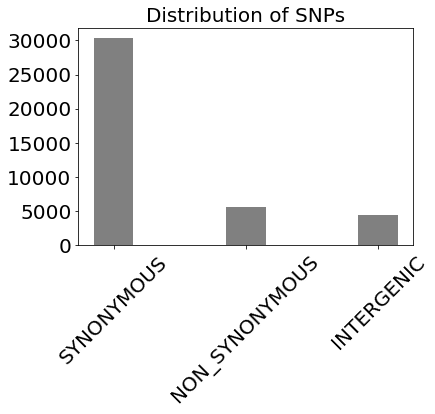

In [24]:
fig,ax=plt.subplots()
ax.bar(["SYNONYMOUS","NON_SYNONYMOUS","INTERGENIC"],[30300,5636,4418],0.3,color="gray")
plt.title("Distribution of SNPs",fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.yticks(fontsize=20)
plt.xlabel="LOCATION"
plt.show
plt.savefig("SNP location.jpg",dpi=100,bbox_inches="tight")

In [9]:
out3=rev_data.groupby('Gene_ID')['Gene_ID'].count()  
out3.head()

Gene_ID
Gene_gene1182     1
Gene_gene1241     1
Gene_gene1244     2
Gene_gene1470    10
Gene_gene1549     2
Name: Gene_ID, dtype: int64

In [10]:
x=pd.value_counts(rev_data.Gene_ID)
x[x>50]

Intergenic       4418
STM4261           159
Gene_gene2690     151
metH               65
mukB               55
STM4489            53
gltB               52
rpoC               52
Name: Gene_ID, dtype: int64

In [11]:
arti_new_nonsyn.to_csv('arti_new_nonsyn')

In [12]:
#arti_new_syn=arti_data[arti_data.Effect=='SYNONYMOUS_CODING']
#arti_new_syn=arti_new_syn.loc[:,["Gene_ID","Position","Reference","Variant","Old_codon/New_codon"]]
#arti_new_syn.columns=l
#arti_new_syn.reset_index(inplace=True)
#arti_new_syn.drop("index",axis=1,inplace=True)
#pd.value_counts(arti_new_syn.Gene_ID)
#a=arti_new_syn[arti_new_syn.Gene_ID=="STM4261"]
#b=arti_new_syn[arti_new_syn.Reference=="G"]
#arti_new_syn.to_csv('arti_new_syn')

In [21]:
#arti_old_data=pd.read_csv("Cip_2B_SNP.csv",encoding="utf-16")
#arti_old_data.info()
#arti_old_nonsyn=arti_old_data[arti_old_data.Effect=='NON_SYNONYMOUS_CODING']
#arti_old_syn=arti_old_data[arti_old_data.Effect=='SYNONYMOUS_CODING']
#arti_old_nonsyn.reset_index(inplace=True)
#arti_old_nonsyn.drop("index",axis=1,inplace=True)
#arti_old_nonsyn=arti_old_nonsyn.loc[:,["Gene_ID","Position","Reference","Variant","Old_codon/New_codon"]]
#arti_old_nonsyn.head()
#arti_old_nonsyn.to_csv('arti_old_nonsyn')

In [ ]:
#arti_old_syn=arti_old_data[arti_old_data.Effect=='SYNONYMOUS_CODING']
#arti_old_syn=arti_old_syn.loc[:,["Gene_ID","Position","Reference","Variant","Old_codon/New_codon"]]
#arti_old_syn.head()
#arti_old_syn.to_csv('arti_old_syn')

In [ ]:
#arti_old_syn.head()

In [ ]:
#arti_new_syn.drop('index',axis=1,inplace=True)
#arti_new_syn_counts=pd.value_counts(arti_new_syn.Gene_ID)
#arti_new_syn_counts=pd.DataFrame(arti_new_syn_counts)
#arti_new_syn_counts.reset_index(inplace=True)
#arti_new_syn_counts.columns=["Gene_ID","count"]
#arti_new_syn_counts.head()
#arti_new_syn_counts.to_csv('new_syn_counts')

In [23]:
import os
os.getcwd()

'C:\\Users\\anubr'

In [22]:
rev_data.head()
#rev_data.shape

,Position,Reference,Variant,Quality,Coverage,Gene_ID,Exon_Rank,Effect,old_AA/new_AA,Old_codon/New_codon,Codon_Num(CDS)
0,507,C,T,221.999,1028,thrA,1,SYNONYMOUS_CODING,G/G,ggC/ggT,57.0
1,537,A,C,221.999,1130,thrA,1,SYNONYMOUS_CODING,A/A,gcA/gcC,67.0
2,744,A,C,221.999,1316,thrA,1,SYNONYMOUS_CODING,G/G,ggA/ggC,136.0
3,747,T,C,221.999,1431,thrA,1,SYNONYMOUS_CODING,L/L,ctT/ctC,137.0
4,762,G,A,221.999,1355,thrA,1,SYNONYMOUS_CODING,G/G,ggG/ggA,142.0


In [33]:
#rpoC mutation distribution
rpoC_data=rev_data[rev_data.Gene_ID=="rpoC"]
rpoC_mutSites=list(rpoC_data["Position"])
rpoC_mutSites
rpoC_gene=[n for n in range(4370012,4374250)]
len(rpoC_gene),len(rpoC_mutSites)

(4238, 52)

/home/anubrata/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


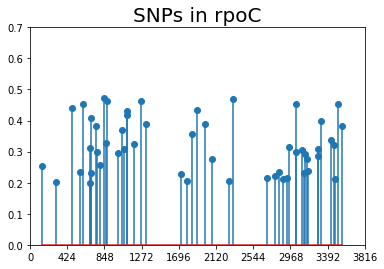

In [73]:
values=np.random.uniform(size=52,low=0.2,high=0.5)
plt.stem(rpoC_mutSites,values)
plt.title("SNPs in rpoC",fontsize=20)
plt.xlim(4370157,4374198)
plt.ylim(0,0.7)
locs,labels=plt.xticks()
lst=[n for n in range(0,4240,(4240//10))]
plt.xticks(locs,lst)
plt.savefig("SNP rpoC.jpg",dpi=100,bbox_inches="tight")

In [45]:
rpoC_mutSites

[4370157,
 4370346,
 4370568,
 4370670,
 4370709,
 4370808,
 4370811,
 4370814,
 4370817,
 4370886,
 4370904,
 4370944,
 4370994,
 4371027,
 4371030,
 4371177,
 4371234,
 4371261,
 4371306,
 4371309,
 4371393,
 4371489,
 4371561,
 4372035,
 4372107,
 4372176,
 4372245,
 4372353,
 4372449,
 4372677,
 4372725,
 4373191,
 4373298,
 4373346,
 4373400,
 4373454,
 4373481,
 4373574,
 4373577,
 4373661,
 4373682,
 4373700,
 4373724,
 4373736,
 4373871,
 4373874,
 4373910,
 4374042,
 4374087,
 4374102,
 4374144,
 4374198]

In [24]:
AG_transition=rev_data[(rev_data.Reference=='A') & (rev_data.Variant=='G')].Position.count()
GA_transition=rev_data[(rev_data.Reference=='G') & (rev_data.Variant=='A')].Position.count()
sum_AG=AG_transition+GA_transition
tot_count=rev_data.Position.count()
perct_AG=(sum_AG/tot_count)*100
perct_AG

39.60301532135689

In [25]:
CT_transition=rev_data[(rev_data.Reference=='C') & (rev_data.Variant=='T')].Position.count()
TC_transition=rev_data[(rev_data.Reference=='T') & (rev_data.Variant=='C')].Position.count()
sum_CT=CT_transition+TC_transition
tot_count=rev_data.Position.count()
perct_CT=(sum_CT/tot_count)*100
perct_CT

39.63972783787752

In [26]:
perct_transition=perct_AG+perct_CT
perct_transition

79.24274315923441

In [42]:
GC_transversion=rev_data[(rev_data.Reference=='G') & (rev_data.Variant=='C')].Position.count()
CG_transversion=rev_data[(rev_data.Reference=='C') & (rev_data.Variant=='G')].Position.count()
sum_GC=GC_transversion +CG_transversion
tot_count=rev_data.Position.count()
perct_GC=(sum_GC/tot_count)*100
perct_GC

4.040824318370944

In [43]:
AT_transversion=rev_data[(rev_data.Reference=='A') & (rev_data.Variant=='T')].Position.count()
TA_transversion=rev_data[(rev_data.Reference=='T') & (rev_data.Variant=='A')].Position.count()
sum_AT=AT_transversion +TA_transversion
tot_count=rev_data.Position.count()
perct_AT=(sum_AT/tot_count)*100
perct_AT

3.798521709334769

In [44]:
AC_transversion=rev_data[(rev_data.Reference=='A') & (rev_data.Variant=='C')].Position.count()
CA_transversion=rev_data[(rev_data.Reference=='C') & (rev_data.Variant=='A')].Position.count()
sum_AC=AC_transversion +CA_transversion
tot_count=rev_data.Position.count()
perct_AC=(sum_AC/tot_count)*100
perct_AC

6.361055362474913

In [45]:
GT_transversion=rev_data[(rev_data.Reference=='G') & (rev_data.Variant=='T')].Position.count()
TG_transversion=rev_data[(rev_data.Reference=='T') & (rev_data.Variant=='G')].Position.count()
sum_GT=GT_transversion +TG_transversion
tot_count=rev_data.Position.count()
perct_GT=(sum_GT/tot_count)*100
perct_GT

6.556855450584953

In [47]:
perct_transversion=perct_GC+perct_AT+perct_AC+perct_GT
perct_transversion

20.757256840765578

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

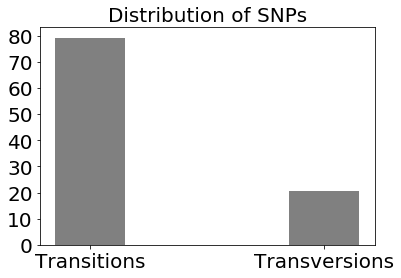

In [70]:
fig,ax=plt.subplots()
ax.bar(["Transitions","Transversions"],[79.24,20.75],0.3,color="gray")
plt.title("Distribution of SNPs",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel="SNPs"
plt.show
plt.savefig("SNP dist.png")

In [ ]:
vec=np.arange(437002,4374250)

vec


In [ ]:
rev_data.head()
